# Preparamos el modelo para ser entrenado

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/data_limpio.csv",sep=",")

X = df[['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]']]
y = df["x_e_out [-]"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}') 
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.006465194461892445
R2 Score: 0.36351122883160025
Root Mean Squared Error: 0.08040643296336708


In [8]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

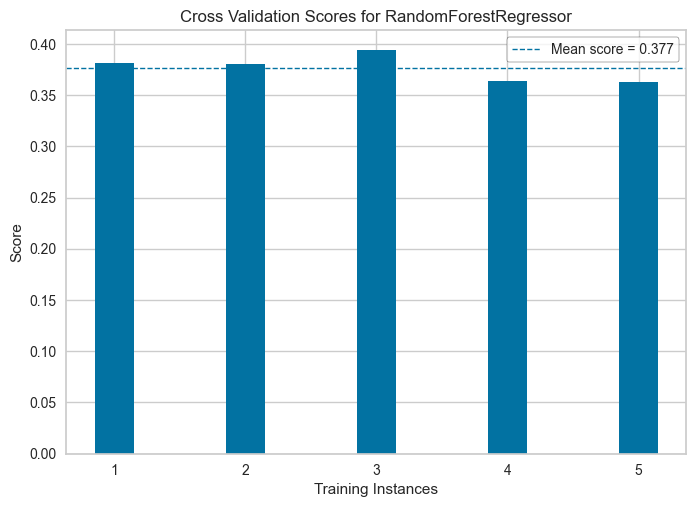

In [9]:
vis = CVScores(model)
vis.fit(X, y)
vis.show();

c:\Users\Matheus Zottis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


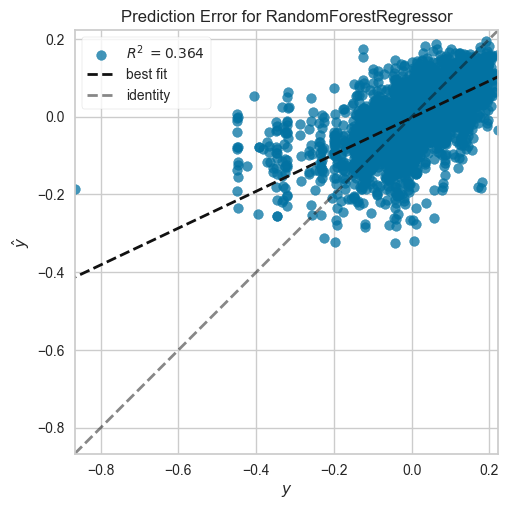

In [10]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visu = PredictionError(model)
visu.fit(X_train, y_train)
visu.score(X_test, y_test)
visu.show();

### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred2 = model2.predict(X_test)

In [13]:
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred)
rmse2 = np.sqrt(mse2)

print(f'Mean Squared Error: {mse2}')
print(f'R2 Score: {r2_2}') 
print(f'Root Mean Squared Error: {rmse2}')

Mean Squared Error: 0.007639454920044073
R2 Score: 0.36351122883160025
Root Mean Squared Error: 0.08740397542471437


In [14]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import cross_val_score

cv_scores2 = cross_val_score(model2, X, y, cv=5, scoring='r2')

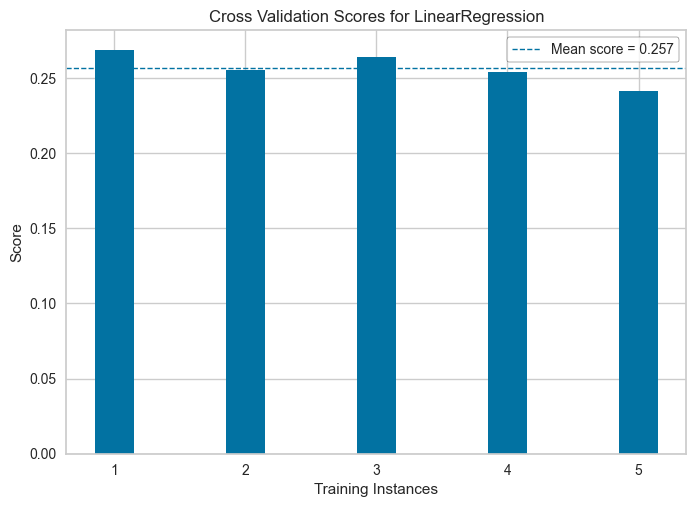

In [15]:
vis2 = CVScores(model2)
vis2.fit(X, y)
vis2.show();

c:\Users\Matheus Zottis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


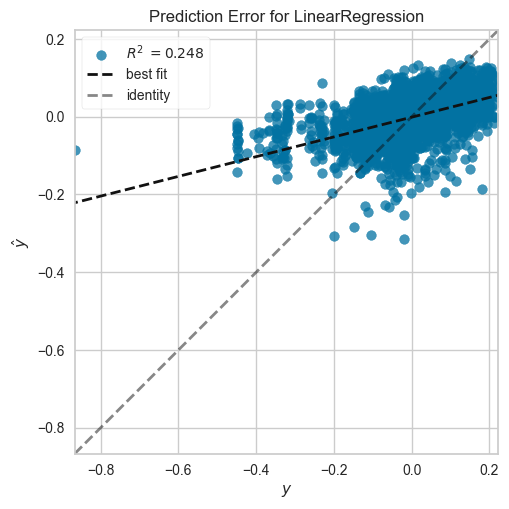

In [25]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visu2 = PredictionError(model2)
visu2.fit(X_train, y_train)
visu2.score(X_test, y_test)
visu2.show();

### Polinomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

In [18]:
model3 = LinearRegression()

In [19]:
model3.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
y_pred3 = model3.predict(X_test_poly)

In [21]:
mse3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)
rmse3 = np.sqrt(mse3)
print(f'Mean Squared Error: {mse3}')
print(f'R2 Score: {r2_3}') 
print(f'Root Mean Squared Error: {rmse3}')


Mean Squared Error: 0.006465194461892445
R2 Score: 0.36351122883160025
Root Mean Squared Error: 0.08040643296336708


In [22]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import cross_val_score

cv_scores3 = cross_val_score(model3, X, y, cv=5, scoring='r2')

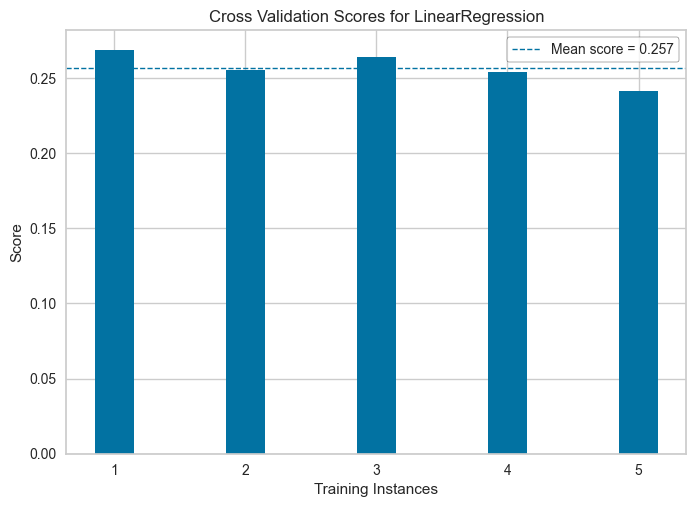

In [23]:
vis3 = CVScores(model3)
vis3.fit(X, y)
vis3.show();

#### Comparamos los modelos (con un DataFrame porque no se puede utlilizar una matriz de confusión)

In [28]:
import pandas as pd
evaluation_metrics = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'MSE': [mse, mse2, mse3],
    'RMSE': [rmse, rmse2, rmse3],
    'R-squared': [r2, r2_2, r2_3]
}

comparison_df = pd.DataFrame(evaluation_metrics)
print(comparison_df)

     Model       MSE      RMSE  R-squared
0  Model 1  0.006465  0.080406   0.363511
1  Model 2  0.007639  0.087404   0.363511
2  Model 3  0.006465  0.080406   0.363511


## Preparamos la entrega para Kaggle

In [69]:
df_pred = pd.read_csv('../data/data_pred.csv')

In [70]:
df_pred = df_pred.drop(columns='Unnamed: 0')

In [71]:
X_pred = df_pred['id']

In [72]:
def generate_submision_df(columns):
    df_test = pd.read_csv('../data/data_pred.csv',sep=",")
    X_sub = df_test['id']
    X_sub = X_sub[columns.values]
    
    return X_sub

In [73]:
def generate_submission_file(model, X):
    df_test = pd.read_csv('../data/data_pred.csv', sep=",")
    pred = model.predict(X)
    df_test["x_e_out [-]"] = pred
    df_oficial = pd.DataFrame({'Id': df_test['id'], 'x_e_out [-]': pred})
    df_oficial.to_csv(f"../submissions/submission1.csv")

In [75]:
X_sub = generate_submision_df(X_pred)
generate_submission_file(model3, X_sub)

KeyError: '[10417, 10419, 10420, 10422, 10428, 10432, 10433, 10435, 10437, 10446, 10450, 10452, 10462, 10463, 10464, 10477, 10478, 10480, 10481, 10485, 10487, 10488, 10490, 10491, 10492, 10495, 10499, 10506, 10509, 10510, 10515, 10518, 10523, 10527, 10528, 10536, 10541, 10543, 10545, 10547, 10548, 10552, 10555, 10558, 10563, 10571, 10572, 10575, 10581, 10584, 10591, 10592, 10595, 10601, 10603, 10606, 10609, 10618, 10622, 10623, 10625, 10626, 10627, 10630, 10631, 10632, 10637, 10641, 10644, 10646, 10651, 10653, 10665, 10668, 10672, 10676, 10677, 10679, 10680, 10681, 10686, 10691, 10694, 10697, 10699, 10702, 10705, 10708, 10709, 10713, 10716, 10720, 10721, 10723, 10724, 10725, 10735, 10739, 10744, 10746, 10747, 10749, 10750, 10753, 10756, 10757, 10763, 10767, 10768, 10770, 10773, 10774, 10776, 10778, 10780, 10782, 10783, 10784, 10787, 10788, 10789, 10792, 10796, 10797, 10798, 10800, 10804, 10808, 10809, 10811, 10814, 10817, 10821, 10822, 10823, 10826, 10828, 10832, 10834, 10835, 10836, 10839, 10846, 10847, 10848, 10851, 10859, 10860, 10862, 10866, 10869, 10872, 10874, 10875, 10877, 10878, 10879, 10883, 10886, 10887, 10890, 10892, 10894, 10895, 10896, 10905, 10906, 10909, 10919, 10920, 10928, 10931, 10936, 10937, 10938, 10944, 10945, 10950, 10951, 10955, 10960, 10963, 10964, 10965, 10966, 10967, 10968, 10970, 10974, 10978, 10979, 10982, 10985, 10988, 10993, 10997, 10998, 11000, 11002, 11006, 11007, 11009, 11017, 11019, 11020, 11023, 11031, 11032, 11034, 11039, 11041, 11045, 11046, 11048, 11050, 11051, 11056, 11061, 11062, 11064, 11065, 11067, 11068, 11069, 11070, 11073, 11074, 11076, 11077, 11078, 11093, 11098, 11104, 11105, 11120, 11127, 11128, 11132, 11134, 11148, 11149, 11152, 11157, 11163, 11165, 11167, 11168, 11170, 11180, 11184, 11185, 11186, 11187, 11191, 11198, 11199, 11204, 11205, 11209, 11210, 11211, 11216, 11222, 11229, 11231, 11238, 11240, 11243, 11250, 11251, 11252, 11255, 11256, 11257, 11258, 11260, 11263, 11265, 11266, 11268, 11269, 11271, 11275, 11276, 11282, 11285, 11288, 11295, 11298, 11299, 11305, 11307, 11309, 11311, 11312, 11317, 11318, 11321, 11325, 11326, 11327, 11329, 11330, 11331, 11338, 11340, 11341, 11342, 11343, 11346, 11354, 11359, 11370, 11377, 11381, 11382, 11383, 11384, 11385, 11390, 11392, 11397, 11398, 11399, 11415, 11417, 11420, 11429, 11439, 11444, 11446, 11452, 11458, 11460, 11470, 11471, 11476, 11482, 11483, 11484, 11486, 11487, 11493, 11504, 11508, 11514, 11516, 11521, 11524, 11525, 11526, 11531, 11532, 11536, 11541, 11549, 11550, 11552, 11554, 11555, 11557, 11558, 11565, 11566, 11567, 11576, 11579, 11580, 11583, 11584, 11585, 11589, 11590, 11594, 11596, 11598, 11599, 11607, 11608, 11609, 11613, 11615, 11616, 11619, 11620, 11625, 11626, 11629, 11631, 11633, 11635, 11637, 11639, 11641, 11643, 11644, 11646, 11649, 11650, 11654, 11656, 11657, 11660, 11665, 11667, 11671, 11672, 11673, 11676, 11677, 11679, 11680, 11681, 11682, 11685, 11689, 11694, 11696, 11698, 11703, 11704, 11708, 11711, 11713, 11716, 11717, 11725, 11726, 11729, 11731, 11733, 11735, 11739, 11741, 11742, 11745, 11747, 11748, 11749, 11759, 11762, 11764, 11765, 11770, 11771, 11772, 11773, 11783, 11786, 11787, 11791, 11798, 11799, 11800, 11801, 11806, 11808, 11811, 11814, 11827, 11828, 11831, 11833, 11835, 11839, 11840, 11847, 11848, 11849, 11853, 11858, 11861, 11867, 11869, 11871, 11874, 11877, 11879, 11883, 11889, 11890, 11891, 11893, 11896, 11903, 11905, 11906, 11908, 11915, 11926, 11927, 11933, 11934, 11937, 11939, 11941, 11944, 11947, 11951, 11953, 11955, 11957, 11960, 11963, 11967, 11968, 11969, 11973, 11975, 11977, 11980, 11984, 11994, 11999, 12000, 12013, 12014, 12016, 12019, 12020, 12021, 12023, 12027, 12033, 12036, 12046, 12047, 12048, 12050, 12057, 12060, 12063, 12068, 12070, 12073, 12075, 12079, 12082, 12087, 12094, 12105, 12106, 12112, 12114, 12118, 12124, 12125, 12128, 12129, 12130, 12131, 12137, 12140, 12141, 12142, 12144, 12149, 12153, 12154, 12158, 12161, 12165, 12167, 12169, 12176, 12179, 12180, 12183, 12191, 12192, 12193, 12202, 12203, 12207, 12208, 12218, 12221, 12222, 12227, 12228, 12237, 12238, 12240, 12242, 12243, 12244, 12250, 12255, 12258, 12260, 12261, 12265, 12268, 12274, 12277, 12278, 12284, 12285, 12289, 12290, 12296, 12297, 12305, 12306, 12309, 12312, 12316, 12318, 12321, 12322, 12323, 12325, 12328, 12331, 12334, 12335, 12336, 12342, 12343, 12345, 12348, 12349, 12350, 12354, 12356, 12357, 12358, 12359, 12362, 12367, 12368, 12372, 12378, 12380, 12386, 12391, 12399, 12401, 12405, 12406, 12407, 12411, 12414, 12417, 12423, 12426, 12427, 12428, 12429, 12430, 12437, 12439, 12440, 12441, 12442, 12448, 12449, 12450, 12452, 12460, 12462, 12463, 12464, 12465, 12466, 12468, 12471, 12472, 12473, 12475, 12476, 12477, 12478, 12483, 12486, 12491, 12499, 12510, 12512, 12521, 12527, 12531, 12535, 12538, 12544, 12547, 12549, 12550, 12551, 12552, 12558, 12559, 12562, 12563, 12567, 12573, 12579, 12580, 12582, 12589, 12590, 12592, 12595, 12597, 12599, 12603, 12604, 12605, 12607, 12612, 12613, 12614, 12616, 12617, 12619, 12621, 12627, 12628, 12629, 12631, 12636, 12638, 12643, 12650, 12657, 12659, 12660, 12661, 12662, 12664, 12667, 12675, 12676, 12687, 12688, 12689, 12691, 12693, 12695, 12698, 12702, 12705, 12706, 12710, 12713, 12718, 12719, 12722, 12729, 12732, 12733, 12734, 12736, 12737, 12738, 12740, 12741, 12744, 12747, 12749, 12751, 12754, 12757, 12759, 12762, 12764, 12767, 12769, 12774, 12779, 12786, 12787, 12789, 12790, 12791, 12793, 12795, 12800, 12801, 12802, 12805, 12808, 12809, 12810, 12814, 12817, 12819, 12820, 12821, 12824, 12825, 12826, 12828, 12830, 12835, 12839, 12844, 12853, 12858, 12860, 12871, 12873, 12874, 12875, 12876, 12879, 12882, 12884, 12885, 12887, 12890, 12899, 12900, 12901, 12902, 12907, 12908, 12916, 12920, 12924, 12925, 12926, 12929, 12930, 12934, 12946, 12947, 12948, 12952, 12955, 12956, 12957, 12959, 12962, 12963, 12964, 12967, 12969, 12970, 12971, 12972, 12973, 12975, 12977, 12978, 12979, 12980, 12982, 12985, 12986, 12992, 12994, 12995, 13000, 13001, 13002, 13003, 13006, 13007, 13008, 13010, 13015, 13017, 13018, 13025, 13026, 13027, 13031, 13033, 13035, 13037, 13038, 13041, 13043, 13045, 13050, 13052, 13054, 13061, 13066, 13067, 13068, 13069, 13074, 13075, 13079, 13080, 13082, 13085, 13088, 13092, 13102, 13105, 13110, 13111, 13113, 13114, 13117, 13126, 13127, 13132, 13139, 13140, 13142, 13143, 13144, 13150, 13151, 13153, 13155, 13157, 13158, 13161, 13162, 13163, 13168, 13169, 13172, 13180, 13185, 13192, 13203, 13205, 13214, 13216, 13218, 13220, 13222, 13226, 13237, 13238, 13245, 13247, 13249, 13252, 13253, 13256, 13257, 13260, 13263, 13269, 13271, 13273, 13275, 13276, 13283, 13284, 13286, 13289, 13296, 13298, 13302, 13307, 13310, 13311, 13314, 13315, 13316, 13322, 13324, 13328, 13329, 13335, 13337, 13342, 13343, 13346, 13347, 13354, 13360, 13362, 13368, 13369, 13372, 13376, 13379, 13382, 13383, 13384, 13385, 13389, 13391, 13392, 13401, 13402, 13403, 13404, 13405, 13407, 13408, 13410, 13412, 13415, 13416, 13418, 13420, 13422, 13425, 13431, 13434, 13436, 13437, 13441, 13442, 13443, 13445, 13448, 13451, 13454, 13457, 13458, 13460, 13461, 13465, 13467, 13469, 13472, 13476, 13480, 13484, 13490, 13493, 13494, 13496, 13498, 13499, 13501, 13502, 13507, 13511, 13513, 13516, 13525, 13526, 13529, 13531, 13538, 13541, 13546, 13550, 13554, 13556, 13558, 13559, 13562, 13568, 13570, 13590, 13592, 13594, 13600, 13602, 13604, 13605, 13607, 13611, 13614, 13617, 13620, 13627, 13628, 13635, 13637, 13638, 13639, 13640, 13641, 13648, 13650, 13653, 13658, 13661, 13662, 13666, 13667, 13668, 13678, 13681, 13682, 13684, 13687, 13688, 13689, 13694, 13695, 13697, 13698, 13704, 13705, 13706, 13708, 13713, 13715, 13717, 13725, 13726, 13731, 13733, 13736, 13738, 13741, 13749, 13752, 13758, 13765, 13766, 13768, 13770, 13771, 13775, 13779, 13783, 13786, 13787, 13795, 13799, 13802, 13803, 13805, 13809, 13813, 13818, 13824, 13826, 13827, 13834, 13839, 13842, 13844, 13845, 13851, 13852, 13857, 13859, 13864, 13870, 13872, 13873, 13877, 13880, 13882, 13884, 13885, 13891, 13895, 13899, 13903, 13904, 13906, 13911, 13912, 13913, 13915, 13916, 13919, 13925, 13928, 13932, 13935, 13939, 13943, 13944, 13945, 13946, 13950, 13951, 13955, 13956, 13962, 13963, 13964, 13967, 13976, 13977, 13978, 13982, 13983, 13985, 13988, 13989, 13993, 13994, 13995, 14000, 14002, 14004, 14005, 14009, 14014, 14018, 14019, 14029, 14053, 14060, 14064, 14066, 14073, 14074, 14076, 14078, 14079, 14080, 14081, 14084, 14085, 14086, 14087, 14089, 14090, 14094, 14095, 14097, 14098, 14102, 14105, 14108, 14109, 14112, 14114, 14117, 14121, 14124, 14125, 14126, 14127, 14129, 14131, 14133, 14138, 14139, 14144, 14146, 14150, 14153, 14164, 14168, 14173, 14174, 14175, 14177, 14179, 14180, 14181, 14183, 14184, 14186, 14188, 14189, 14193, 14198, 14203, 14208, 14211, 14213, 14214, 14216, 14219, 14228, 14232, 14243, 14245, 14246, 14252, 14260, 14261, 14264, 14271, 14279, 14282, 14284, 14287, 14289, 14291, 14294, 14300, 14305, 14314, 14321, 14326, 14330, 14333, 14335, 14336, 14337, 14346, 14348, 14351, 14356, 14365, 14370, 14374, 14375, 14376, 14379, 14383, 14384, 14391, 14392, 14394, 14396, 14397, 14399, 14401, 14403, 14404, 14408, 14414, 14415, 14416, 14424, 14426, 14427, 14429, 14432, 14433, 14436, 14445, 14447, 14448, 14451, 14455, 14457, 14459, 14461, 14463, 14468, 14471, 14473, 14474, 14476, 14477, 14478, 14479, 14484, 14485, 14487, 14489, 14492, 14496, 14497, 14500, 14503, 14509, 14510, 14511, 14515, 14522, 14524, 14525, 14530, 14534, 14536, 14541, 14545, 14549, 14551, 14552, 14554, 14560, 14563, 14567, 14573, 14575, 14577, 14582, 14586, 14589, 14590, 14595, 14602, 14604, 14607, 14608, 14609, 14617, 14619, 14624, 14626, 14629, 14630, 14631, 14633, 14637, 14638, 14639, 14640, 14643, 14644, 14646, 14647, 14649, 14650, 14651, 14660, 14662, 14669, 14675, 14676, 14677, 14679, 14682, 14683, 14695, 14704, 14705, 14707, 14708, 14709, 14713, 14716, 14719, 14721, 14722, 14723, 14724, 14731, 14733, 14735, 14736, 14739, 14741, 14745, 14751, 14753, 14754, 14756, 14757, 14758, 14759, 14760, 14767, 14774, 14776, 14777, 14778, 14780, 14783, 14786, 14792, 14793, 14795, 14800, 14803, 14804, 14805, 14807, 14814, 14817, 14818, 14820, 14828, 14829, 14833, 14839, 14841, 14844, 14845, 14846, 14849, 14852, 14872, 14875, 14887, 14895, 14897, 14899, 14900, 14905, 14908, 14909, 14913, 14914, 14915, 14916, 14917, 14919, 14923, 14924, 14926, 14933, 14939, 14941, 14947, 14949, 14951, 14955, 14956, 14957, 14959, 14960, 14961, 14962, 14968, 14970, 14971, 14974, 14981, 14994, 14995, 14996, 14999, 15002, 15007, 15009, 15017, 15021, 15023, 15029, 15040, 15041, 15043, 15044, 15046, 15047, 15049, 15052, 15054, 15056, 15057, 15058, 15064, 15067, 15068, 15069, 15071, 15072, 15073, 15077, 15078, 15079, 15083, 15084, 15087, 15090, 15092, 15096, 15101, 15102, 15107, 15108, 15110, 15118, 15119, 15121, 15123, 15128, 15131, 15134, 15135, 15136, 15140, 15141, 15144, 15145, 15146, 15153, 15154, 15155, 15156, 15158, 15159, 15164, 15165, 15168, 15169, 15170, 15171, 15172, 15173, 15174, 15177, 15179, 15180, 15182, 15184, 15188, 15190, 15193, 15196, 15197, 15203, 15204, 15205, 15208, 15209, 15210, 15215, 15219, 15223, 15224, 15225, 15228, 15236, 15238, 15239, 15240, 15241, 15242, 15243, 15245, 15247, 15250, 15251, 15255, 15256, 15262, 15265, 15267, 15275, 15277, 15279, 15280, 15281, 15282, 15289, 15296, 15300, 15301, 15302, 15305, 15307, 15311, 15312, 15315, 15323, 15325, 15330, 15338, 15340, 15345, 15346, 15347, 15348, 15359, 15363, 15367, 15368, 15369, 15375, 15378, 15379, 15384, 15386, 15388, 15390, 15391, 15392, 15400, 15404, 15407, 15408, 15413, 15414, 15417, 15418, 15419, 15426, 15428, 15431, 15434, 15438, 15441, 15452, 15457, 15459, 15460, 15461, 15465, 15471, 15473, 15484, 15487, 15489, 15492, 15496, 15498, 15500, 15507, 15508, 15509, 15511, 15514, 15518, 15523, 15527, 15529, 15531, 15532, 15535, 15537, 15539, 15540, 15542, 15546, 15550, 15551, 15555, 15558, 15559, 15561, 15562, 15566, 15569, 15571, 15574, 15579, 15581, 15584, 15587, 15588, 15595, 15597, 15601, 15602, 15603, 15605, 15611, 15612, 15616, 15618, 15626, 15628, 15631, 15635, 15638, 15640, 15641, 15642, 15646, 15647, 15648, 15650, 15653, 15656, 15657, 15662, 15665, 15671, 15672, 15673, 15674, 15675, 15676, 15678, 15679, 15680, 15681, 15682, 15685, 15687, 15690, 15696, 15697, 15700, 15702, 15703, 15707, 15712, 15713, 15721, 15723, 15726, 15727, 15729, 15737, 15739, 15740, 15748, 15750, 15751, 15752, 15755, 15756, 15757, 15759, 15760, 15761, 15762, 15763, 15764, 15765, 15767, 15770, 15771, 15775, 15776, 15777, 15779, 15780, 15784, 15785, 15788, 15789, 15792, 15793, 15795, 15796, 15797, 15798, 15799, 15801, 15806, 15807, 15808, 15810, 15819, 15821, 15828, 15831, 15832, 15841, 15842, 15843, 15844, 15847, 15849, 15850, 15862, 15863, 15864, 15866, 15870, 15877, 15878, 15880, 15881, 15883, 15886, 15887, 15888, 15890, 15891, 15892, 15897, 15913, 15914, 15916, 15919, 15921, 15923, 15926, 15931, 15937, 15939, 15940, 15942, 15943, 15946, 15947, 15950, 15951, 15952, 15957, 15958, 15963, 15966, 15967, 15968, 15969, 15971, 15974, 15975, 15977, 15979, 15980, 15984, 15987, 15988, 15989, 15990, 15992, 15994, 15998, 15999, 16002, 16003, 16006, 16007, 16008, 16012, 16013, 16017, 16018, 16023, 16027, 16031, 16032, 16033, 16035, 16037, 16040, 16045, 16048, 16052, 16053, 16056, 16058, 16060, 16061, 16066, 16068, 16069, 16071, 16074, 16075, 16079, 16085, 16087, 16098, 16099, 16102, 16109, 16111, 16112, 16114, 16118, 16119, 16121, 16130, 16138, 16139, 16140, 16141, 16144, 16146, 16147, 16149, 16151, 16153, 16154, 16155, 16162, 16168, 16170, 16173, 16175, 16176, 16179, 16181, 16183, 16184, 16185, 16190, 16193, 16197, 16199, 16202, 16203, 16209, 16214, 16217, 16218, 16220, 16221, 16223, 16226, 16228, 16232, 16233, 16235, 16236, 16237, 16239, 16243, 16244, 16245, 16247, 16248, 16252, 16255, 16257, 16259, 16268, 16276, 16279, 16280, 16286, 16289, 16294, 16295, 16296, 16298, 16299, 16301, 16303, 16308, 16314, 16316, 16317, 16325, 16333, 16334, 16335, 16339, 16344, 16346, 16349, 16356, 16358, 16360, 16362, 16365, 16366, 16370, 16372, 16375, 16377, 16382, 16383, 16385, 16389, 16391, 16393, 16400, 16401, 16403, 16404, 16409, 16410, 16411, 16414, 16415, 16416, 16417, 16419, 16420, 16427, 16429, 16430, 16433, 16434, 16436, 16439, 16441, 16444, 16447, 16448, 16451, 16452, 16455, 16461, 16467, 16473, 16476, 16479, 16480, 16485, 16486, 16489, 16490, 16491, 16493, 16496, 16500, 16506, 16508, 16510, 16511, 16517, 16518, 16520, 16521, 16524, 16530, 16532, 16538, 16540, 16546, 16548, 16549, 16551, 16569, 16573, 16577, 16579, 16580, 16581, 16582, 16583, 16585, 16588, 16590, 16593, 16594, 16595, 16596, 16597, 16598, 16601, 16610, 16613, 16618, 16620, 16621, 16626, 16631, 16638, 16640, 16641, 16647, 16649, 16650, 16652, 16656, 16657, 16660, 16664, 16666, 16667, 16668, 16671, 16674, 16677, 16680, 16684, 16688, 16695, 16696, 16699, 16700, 16705, 16706, 16707, 16709, 16713, 16716, 16717, 16722, 16723, 16724, 16733, 16737, 16738, 16743, 16745, 16747, 16749, 16752, 16756, 16757, 16760, 16761, 16762, 16765, 16766, 16767, 16769, 16771, 16777, 16780, 16781, 16783, 16784, 16785, 16789, 16793, 16797, 16802, 16809, 16810, 16811, 16813, 16814, 16816, 16817, 16818, 16819, 16821, 16824, 16827, 16834, 16838, 16840, 16843, 16845, 16846, 16847, 16849, 16850, 16851, 16853, 16854, 16857, 16860, 16863, 16864, 16866, 16867, 16871, 16873, 16874, 16876, 16878, 16879, 16882, 16883, 16884, 16889, 16895, 16900, 16906, 16910, 16918, 16923, 16924, 16925, 16926, 16935, 16940, 16944, 16954, 16957, 16962, 16963, 16964, 16968, 16970, 16973, 16975, 16976, 16978, 16981, 16986, 16987, 16990, 16991, 16997, 16998, 16999, 17002, 17004, 17005, 17009, 17010, 17013, 17014, 17017, 17018, 17019, 17025, 17029, 17031, 17032, 17033, 17034, 17039, 17042, 17043, 17047, 17054, 17058, 17059, 17061, 17063, 17065, 17070, 17071, 17075, 17076, 17080, 17082, 17083, 17089, 17095, 17098, 17099, 17103, 17104, 17106, 17108, 17114, 17116, 17117, 17120, 17121, 17122, 17127, 17130, 17131, 17137, 17145, 17154, 17155, 17158, 17163, 17170, 17171, 17172, 17174, 17176, 17180, 17189, 17190, 17191, 17197, 17203, 17204, 17213, 17215, 17218, 17219, 17220, 17224, 17228, 17229, 17230, 17231, 17232, 17235, 17236, 17237, 17245, 17251, 17254, 17256, 17257, 17260, 17264, 17283, 17285, 17295, 17300, 17301, 17313, 17324, 17325, 17326, 17330, 17332, 17337, 17341, 17343, 17344, 17346, 17347, 17348, 17353, 17355, 17358, 17365, 17366, 17367, 17368, 17369, 17380, 17381, 17385, 17388, 17391, 17392, 17396, 17398, 17399, 17402, 17407, 17409, 17410, 17414, 17420, 17422, 17423, 17425, 17427, 17428, 17433, 17440, 17442, 17444, 17447, 17448, 17450, 17451, 17454, 17456, 17460, 17465, 17468, 17470, 17472, 17475, 17476, 17477, 17478, 17487, 17492, 17493, 17496, 17502, 17504, 17510, 17517, 17522, 17523, 17524, 17526, 17529, 17532, 17545, 17546, 17548, 17559, 17561, 17562, 17563, 17564, 17566, 17567, 17570, 17573, 17575, 17577, 17579, 17580, 17585, 17586, 17588, 17589, 17590, 17596, 17597, 17598, 17599, 17602, 17603, 17605, 17610, 17613, 17616, 17622, 17630, 17632, 17634, 17639, 17641, 17645, 17646, 17648, 17649, 17656, 17659, 17660, 17662, 17664, 17666, 17669, 17672, 17675, 17678, 17679, 17684, 17685, 17690, 17695, 17697, 17700, 17702, 17703, 17709, 17710, 17724, 17730, 17733, 17738, 17739, 17745, 17747, 17756, 17760, 17764, 17766, 17771, 17773, 17778, 17784, 17793, 17796, 17797, 17800, 17804, 17805, 17811, 17817, 17826, 17830, 17834, 17846, 17848, 17851, 17857, 17860, 17861, 17863, 17867, 17869, 17870, 17871, 17874, 17880, 17882, 17884, 17886, 17887, 17890, 17893, 17897, 17900, 17904, 17906, 17908, 17910, 17912, 17919, 17922, 17924, 17928, 17934, 17940, 17941, 17947, 17949, 17954, 17956, 17957, 17958, 17961, 17962, 17969, 17972, 17974, 17979, 17980, 17981, 17987, 17993, 18000, 18002, 18003, 18005, 18007, 18014, 18016, 18017, 18019, 18021, 18023, 18027, 18028, 18029, 18030, 18031, 18034, 18050, 18056, 18057, 18064, 18065, 18066, 18067, 18069, 18073, 18074, 18075, 18084, 18093, 18094, 18097, 18101, 18104, 18105, 18108, 18114, 18117, 18120, 18121, 18128, 18134, 18135, 18136, 18139, 18141, 18143, 18144, 18145, 18146, 18149, 18152, 18153, 18157, 18160, 18161, 18166, 18170, 18181, 18188, 18192, 18195, 18197, 18200, 18201, 18206, 18207, 18208, 18217, 18221, 18222, 18223, 18227, 18228, 18232, 18233, 18235, 18237, 18242, 18244, 18245, 18247, 18250, 18251, 18259, 18262, 18264, 18267, 18269, 18274, 18279, 18280, 18283, 18288, 18290, 18291, 18292, 18296, 18299, 18305, 18307, 18308, 18310, 18311, 18315, 18318, 18319, 18321, 18333, 18334, 18335, 18338, 18343, 18344, 18355, 18356, 18359, 18362, 18364, 18367, 18368, 18369, 18372, 18374, 18375, 18377, 18385, 18387, 18388, 18397, 18401, 18402, 18407, 18410, 18414, 18416, 18421, 18422, 18426, 18429, 18430, 18431, 18439, 18445, 18449, 18454, 18464, 18466, 18468, 18470, 18477, 18478, 18479, 18481, 18484, 18486, 18489, 18491, 18499, 18502, 18503, 18504, 18506, 18507, 18514, 18516, 18519, 18520, 18523, 18524, 18525, 18538, 18542, 18543, 18547, 18553, 18562, 18563, 18564, 18565, 18567, 18568, 18569, 18579, 18580, 18582, 18584, 18585, 18586, 18588, 18592, 18596, 18597, 18598, 18599, 18600, 18610, 18615, 18617, 18619, 18622, 18623, 18627, 18630, 18636, 18638, 18641, 18642, 18646, 18648, 18653, 18655, 18656, 18660, 18662, 18667, 18671, 18673, 18675, 18676, 18678, 18680, 18684, 18686, 18689, 18691, 18693, 18694, 18697, 18699, 18701, 18703, 18704, 18705, 18706, 18707, 18708, 18710, 18711, 18713, 18718, 18724, 18726, 18728, 18735, 18736, 18739, 18741, 18744, 18745, 18749, 18755, 18757, 18761, 18763, 18764, 18768, 18769, 18771, 18774, 18780, 18781, 18785, 18788, 18794, 18795, 18799, 18801, 18802, 18809, 18813, 18814, 18815, 18816, 18819, 18820, 18824, 18826, 18828, 18833, 18835, 18836, 18839, 18840, 18843, 18844, 18848, 18850, 18852, 18853, 18855, 18861, 18865, 18875, 18876, 18879, 18881, 18882, 18885, 18888, 18890, 18891, 18895, 18897, 18898, 18899, 18900, 18905, 18907, 18909, 18916, 18918, 18920, 18922, 18928, 18929, 18936, 18938, 18940, 18945, 18946, 18952, 18957, 18962, 18963, 18965, 18967, 18973, 18976, 18978, 18983, 18984, 18987, 18989, 18990, 18991, 18992, 18996, 19001, 19004, 19008, 19012, 19013, 19021, 19029, 19032, 19036, 19045, 19047, 19051, 19052, 19056, 19063, 19065, 19067, 19078, 19081, 19085, 19089, 19090, 19091, 19098, 19105, 19109, 19110, 19112, 19114, 19117, 19118, 19126, 19128, 19129, 19131, 19136, 19138, 19141, 19144, 19147, 19151, 19153, 19154, 19160, 19162, 19163, 19165, 19166, 19171, 19177, 19182, 19184, 19186, 19187, 19190, 19192, 19193, 19194, 19205, 19207, 19208, 19219, 19220, 19221, 19222, 19229, 19231, 19232, 19234, 19240, 19243, 19244, 19248, 19249, 19250, 19251, 19252, 19254, 19256, 19257, 19258, 19265, 19267, 19269, 19270, 19272, 19273, 19275, 19277, 19279, 19280, 19281, 19283, 19284, 19285, 19289, 19294, 19296, 19297, 19298, 19301, 19309, 19310, 19314, 19320, 19323, 19325, 19327, 19329, 19333, 19335, 19336, 19341, 19345, 19346, 19350, 19351, 19353, 19354, 19355, 19356, 19357, 19361, 19362, 19368, 19370, 19371, 19372, 19375, 19376, 19380, 19381, 19382, 19383, 19385, 19386, 19388, 19390, 19391, 19400, 19405, 19411, 19413, 19420, 19421, 19423, 19424, 19425, 19433, 19435, 19439, 19440, 19445, 19449, 19451, 19452, 19453, 19455, 19466, 19468, 19472, 19477, 19478, 19481, 19485, 19488, 19500, 19505, 19510, 19512, 19516, 19520, 19523, 19527, 19531, 19533, 19537, 19543, 19544, 19546, 19548, 19549, 19551, 19553, 19563, 19568, 19570, 19572, 19578, 19581, 19584, 19588, 19594, 19595, 19596, 19606, 19619, 19621, 19624, 19628, 19629, 19630, 19652, 19653, 19654, 19657, 19661, 19670, 19677, 19679, 19680, 19685, 19691, 19696, 19699, 19702, 19703, 19704, 19709, 19710, 19717, 19721, 19727, 19729, 19730, 19733, 19738, 19739, 19742, 19743, 19744, 19745, 19747, 19759, 19765, 19766, 19770, 19771, 19785, 19790, 19793, 19795, 19800, 19804, 19805, 19806, 19808, 19809, 19810, 19816, 19817, 19821, 19826, 19828, 19832, 19834, 19835, 19839, 19842, 19844, 19855, 19856, 19857, 19866, 19868, 19869, 19874, 19875, 19876, 19882, 19884, 19885, 19891, 19894, 19895, 19901, 19909, 19910, 19912, 19914, 19925, 19927, 19928, 19932, 19934, 19935, 19943, 19944, 19948, 19949, 19951, 19952, 19955, 19956, 19958, 19960, 19963, 19970, 19975, 19981, 19983, 19985, 19989, 19992, 19994, 19999, 20006, 20008, 20012, 20013, 20018, 20020, 20021, 20023, 20025, 20026, 20027, 20028, 20030, 20031, 20033, 20034, 20035, 20036, 20037, 20039, 20045, 20046, 20048, 20051, 20053, 20054, 20055, 20057, 20058, 20061, 20063, 20069, 20072, 20073, 20075, 20079, 20082, 20085, 20086, 20094, 20098, 20102, 20103, 20114, 20115, 20116, 20119, 20121, 20127, 20129, 20136, 20139, 20140, 20141, 20142, 20144, 20146, 20147, 20158, 20162, 20165, 20168, 20170, 20173, 20178, 20182, 20188, 20195, 20197, 20199, 20207, 20210, 20216, 20217, 20220, 20221, 20224, 20227, 20231, 20236, 20239, 20242, 20243, 20244, 20247, 20253, 20254, 20268, 20271, 20280, 20287, 20296, 20297, 20298, 20299, 20300, 20301, 20309, 20311, 20315, 20316, 20318, 20319, 20320, 20323, 20327, 20328, 20334, 20337, 20343, 20345, 20346, 20347, 20351, 20352, 20355, 20362, 20364, 20365, 20370, 20374, 20381, 20382, 20385, 20394, 20395, 20404, 20408, 20411, 20412, 20414, 20417, 20419, 20423, 20427, 20429, 20434, 20436, 20437, 20439, 20446, 20448, 20452, 20453, 20458, 20459, 20460, 20463, 20467, 20471, 20476, 20482, 20487, 20490, 20491, 20500, 20502, 20503, 20505, 20506, 20511, 20512, 20513, 20515, 20516, 20518, 20521, 20522, 20523, 20527, 20533, 20536, 20537, 20540, 20543, 20545, 20548, 20550, 20564, 20565, 20566, 20575, 20578, 20580, 20581, 20584, 20585, 20588, 20590, 20591, 20593, 20608, 20610, 20611, 20614, 20615, 20618, 20621, 20622, 20623, 20626, 20628, 20633, 20636, 20639, 20640, 20644, 20646, 20647, 20649, 20652, 20656, 20659, 20660, 20661, 20663, 20664, 20666, 20668, 20671, 20676, 20677, 20678, 20680, 20684, 20691, 20696, 20697, 20708, 20710, 20712, 20714, 20715, 20716, 20718, 20719, 20723, 20724, 20728, 20734, 20737, 20738, 20739, 20741, 20742, 20743, 20746, 20747, 20752, 20762, 20763, 20764, 20765, 20767, 20768, 20771, 20772, 20778, 20779, 20785, 20786, 20794, 20796, 20802, 20807, 20809, 20816, 20817, 20818, 20819, 20820, 20821, 20825, 20830, 20832, 20836, 20844, 20845, 20849, 20850, 20854, 20859, 20865, 20866, 20872, 20873, 20874, 20875, 20877, 20881, 20884, 20886, 20890, 20891, 20893, 20899, 20901, 20904, 20906, 20907, 20910, 20914, 20918, 20926, 20927, 20934, 20937, 20943, 20944, 20945, 20947, 20948, 20950, 20952, 20953, 20957, 20959, 20965, 20970, 20971, 20974, 20977, 20982, 20985, 20987, 20992, 20994, 20995, 20996, 20997, 20998, 21006, 21007, 21011, 21014, 21019, 21022, 21025, 21026, 21044, 21049, 21052, 21060, 21063, 21065, 21066, 21067, 21069, 21070, 21071, 21073, 21076, 21078, 21081, 21082, 21088, 21093, 21094, 21095, 21103, 21104, 21105, 21109, 21111, 21112, 21113, 21120, 21123, 21124, 21125, 21126, 21131, 21133, 21138, 21141, 21144, 21145, 21149, 21150, 21153, 21154, 21155, 21158, 21161, 21162, 21170, 21182, 21183, 21184, 21191, 21200, 21206, 21208, 21210, 21211, 21213, 21214, 21218, 21219, 21223, 21224, 21225, 21226, 21227, 21229, 21233, 21237, 21238, 21239, 21241, 21242, 21244, 21247, 21248, 21250, 21252, 21253, 21255, 21257, 21263, 21265, 21268, 21270, 21277, 21281, 21289, 21290, 21291, 21293, 21296, 21299, 21303, 21310, 21313, 21316, 21319, 21322, 21327, 21328, 21329, 21330, 21333, 21336, 21341, 21342, 21346, 21352, 21353, 21357, 21358, 21359, 21360, 21362, 21364, 21365, 21367, 21368, 21373, 21374, 21375, 21380, 21385, 21388, 21395, 21401, 21402, 21404, 21411, 21421, 21422, 21424, 21426, 21433, 21436, 21437, 21439, 21441, 21442, 21443, 21446, 21448, 21452, 21455, 21461, 21463, 21464, 21465, 21467, 21472, 21473, 21474, 21476, 21477, 21479, 21486, 21489, 21490, 21498, 21501, 21502, 21503, 21504, 21505, 21507, 21508, 21509, 21510, 21511, 21514, 21516, 21517, 21521, 21522, 21523, 21524, 21528, 21530, 21531, 21532, 21534, 21540, 21541, 21543, 21545, 21546, 21548, 21549, 21550, 21551, 21552, 21558, 21559, 21561, 21568, 21573, 21574, 21576, 21579, 21580, 21582, 21588, 21592, 21594, 21601, 21605, 21607, 21610, 21613, 21618, 21620, 21623, 21635, 21636, 21640, 21643, 21649, 21657, 21658, 21659, 21668, 21671, 21676, 21677, 21678, 21681, 21686, 21690, 21696, 21697, 21698, 21699, 21700, 21704, 21710, 21716, 21717, 21719, 21722, 21728, 21731, 21735, 21737, 21738, 21739, 21745, 21750, 21754, 21755, 21756, 21762, 21764, 21767, 21772, 21774, 21779, 21780, 21784, 21785, 21787, 21796, 21802, 21803, 21804, 21807, 21810, 21814, 21816, 21818, 21819, 21820, 21822, 21825, 21827, 21831, 21832, 21836, 21841, 21843, 21853, 21855, 21857, 21862, 21867, 21868, 21872, 21873, 21879, 21881, 21888, 21893, 21894, 21895, 21896, 21902, 21903, 21907, 21908, 21909, 21913, 21917, 21918, 21920, 21921, 21923, 21924, 21926, 21931, 21932, 21933, 21936, 21942, 21945, 21946, 21950, 21951, 21956, 21960, 21964, 21971, 21979, 21986, 21987, 21988, 21990, 21991, 21992, 21995, 21997, 21998, 22002, 22007, 22008, 22009, 22012, 22014, 22015, 22016, 22017, 22018, 22020, 22021, 22024, 22026, 22031, 22038, 22041, 22043, 22044, 22045, 22055, 22057, 22059, 22068, 22072, 22076, 22077, 22078, 22079, 22085, 22087, 22088, 22091, 22098, 22099, 22102, 22109, 22110, 22119, 22123, 22124, 22125, 22126, 22131, 22133, 22134, 22137, 22147, 22149, 22150, 22153, 22157, 22158, 22161, 22171, 22173, 22174, 22176, 22183, 22184, 22185, 22191, 22196, 22197, 22200, 22201, 22207, 22209, 22212, 22215, 22216, 22219, 22220, 22222, 22226, 22241, 22247, 22250, 22253, 22254, 22255, 22265, 22267, 22272, 22274, 22275, 22281, 22285, 22289, 22291, 22293, 22297, 22300, 22301, 22307, 22309, 22310, 22319, 22323, 22328, 22331, 22333, 22335, 22337, 22341, 22342, 22345, 22347, 22350, 22355, 22356, 22360, 22367, 22369, 22376, 22377, 22385, 22393, 22401, 22410, 22412, 22415, 22416, 22418, 22422, 22423, 22425, 22432, 22433, 22434, 22443, 22444, 22447, 22448, 22451, 22455, 22456, 22457, 22459, 22461, 22463, 22465, 22466, 22468, 22469, 22471, 22474, 22475, 22477, 22481, 22485, 22488, 22499, 22500, 22501, 22503, 22505, 22512, 22513, 22516, 22520, 22523, 22527, 22529, 22531, 22539, 22541, 22544, 22545, 22550, 22551, 22553, 22557, 22559, 22563, 22570, 22575, 22578, 22580, 22581, 22582, 22584, 22595, 22596, 22597, 22608, 22616, 22617, 22618, 22619, 22621, 22623, 22625, 22627, 22628, 22635, 22640, 22641, 22643, 22647, 22649, 22653, 22660, 22661, 22670, 22671, 22673, 22688, 22689, 22692, 22696, 22698, 22699, 22701, 22704, 22705, 22708, 22711, 22712, 22713, 22714, 22720, 22723, 22724, 22728, 22735, 22738, 22744, 22745, 22749, 22751, 22752, 22756, 22762, 22763, 22764, 22765, 22766, 22769, 22773, 22775, 22776, 22778, 22780, 22781, 22782, 22785, 22792, 22796, 22802, 22803, 22806, 22812, 22814, 22815, 22822, 22830, 22847, 22848, 22849, 22850, 22853, 22855, 22858, 22859, 22860, 22862, 22866, 22870, 22871, 22872, 22876, 22877, 22881, 22882, 22883, 22885, 22887, 22890, 22893, 22898, 22902, 22907, 22908, 22911, 22913, 22916, 22921, 22922, 22924, 22928, 22931, 22933, 22934, 22936, 22938, 22941, 22942, 22944, 22945, 22946, 22950, 22957, 22958, 22965, 22967, 22968, 22969, 22971, 22976, 22978, 22989, 22990, 22992, 22998, 22999, 23000, 23001, 23004, 23014, 23016, 23021, 23026, 23029, 23034, 23035, 23043, 23047, 23048, 23050, 23060, 23062, 23064, 23068, 23072, 23073, 23076, 23077, 23079, 23086, 23089, 23090, 23096, 23097, 23098, 23099, 23101, 23102, 23103, 23105, 23112, 23114, 23115, 23117, 23119, 23125, 23126, 23127, 23133, 23135, 23136, 23138, 23140, 23145, 23159, 23162, 23165, 23166, 23168, 23169, 23171, 23178, 23179, 23180, 23184, 23185, 23188, 23189, 23190, 23196, 23212, 23218, 23222, 23223, 23224, 23226, 23227, 23229, 23230, 23237, 23241, 23242, 23245, 23250, 23253, 23261, 23263, 23264, 23266, 23269, 23270, 23279, 23280, 23281, 23282, 23285, 23286, 23289, 23294, 23300, 23305, 23306, 23321, 23324, 23327, 23328, 23330, 23332, 23334, 23337, 23338, 23345, 23348, 23351, 23354, 23363, 23365, 23366, 23369, 23373, 23375, 23381, 23382, 23389, 23391, 23397, 23400, 23402, 23407, 23408, 23409, 23410, 23412, 23416, 23419, 23426, 23428, 23432, 23434, 23436, 23437, 23444, 23445, 23446, 23454, 23458, 23460, 23461, 23462, 23464, 23465, 23466, 23470, 23474, 23476, 23477, 23479, 23481, 23483, 23491, 23495, 23496, 23499, 23501, 23502, 23504, 23507, 23511, 23518, 23523, 23528, 23530, 23536, 23539, 23543, 23547, 23550, 23552, 23553, 23555, 23557, 23558, 23559, 23560, 23561, 23564, 23569, 23572, 23578, 23579, 23580, 23581, 23583, 23584, 23589, 23590, 23597, 23604, 23605, 23606, 23608, 23614, 23617, 23618, 23619, 23626, 23628, 23629, 23635, 23637, 23640, 23642, 23644, 23646, 23648, 23651, 23655, 23661, 23664, 23668, 23678, 23680, 23683, 23685, 23698, 23703, 23705, 23706, 23707, 23718, 23720, 23721, 23722, 23724, 23726, 23728, 23729, 23731, 23737, 23741, 23743, 23744, 23750, 23753, 23756, 23758, 23762, 23770, 23771, 23775, 23777, 23779, 23781, 23785, 23787, 23793, 23801, 23802, 23804, 23808, 23809, 23813, 23814, 23815, 23818, 23819, 23825, 23826, 23832, 23834, 23836, 23839, 23841, 23849, 23853, 23855, 23861, 23864, 23865, 23871, 23872, 23875, 23876, 23878, 23879, 23882, 23886, 23887, 23893, 23896, 23904, 23906, 23909, 23912, 23914, 23921, 23923, 23925, 23926, 23928, 23938, 23941, 23944, 23945, 23947, 23952, 23954, 23956, 23957, 23961, 23962, 23963, 23967, 23972, 23974, 23978, 23982, 23983, 23985, 23989, 23990, 23991, 23996, 23999, 24002, 24006, 24008, 24010, 24013, 24018, 24021, 24025, 24033, 24034, 24042, 24051, 24053, 24056, 24057, 24059, 24060, 24063, 24067, 24070, 24071, 24072, 24073, 24080, 24082, 24083, 24088, 24091, 24096, 24098, 24104, 24108, 24112, 24114, 24117, 24120, 24124, 24125, 24126, 24129, 24130, 24135, 24136, 24144, 24145, 24148, 24149, 24150, 24151, 24152, 24155, 24166, 24167, 24171, 24178, 24179, 24180, 24181, 24183, 24186, 24187, 24188, 24190, 24198, 24200, 24202, 24204, 24206, 24207, 24215, 24216, 24217, 24219, 24220, 24224, 24231, 24240, 24248, 24252, 24256, 24258, 24259, 24263, 24266, 24268, 24276, 24280, 24283, 24286, 24287, 24288, 24295, 24299, 24302, 24304, 24306, 24311, 24312, 24319, 24321, 24323, 24324, 24326, 24332, 24333, 24335, 24336, 24337, 24339, 24341, 24346, 24348, 24350, 24354, 24355, 24356, 24361, 24362, 24366, 24374, 24376, 24377, 24378, 24386, 24389, 24397, 24399, 24400, 24401, 24406, 24407, 24410, 24412, 24414, 24415, 24419, 24425, 24432, 24440, 24441, 24445, 24449, 24452, 24453, 24456, 24458, 24459, 24462, 24463, 24465, 24473, 24475, 24476, 24496, 24498, 24502, 24503, 24506, 24507, 24511, 24512, 24513, 24520, 24522, 24524, 24527, 24528, 24529, 24530, 24531, 24537, 24544, 24547, 24548, 24550, 24553, 24554, 24558, 24559, 24565, 24566, 24571, 24573, 24574, 24576, 24577, 24578, 24580, 24584, 24585, 24586, 24589, 24591, 24593, 24596, 24598, 24599, 24600, 24603, 24604, 24607, 24610, 24611, 24612, 24614, 24621, 24624, 24627, 24635, 24637, 24641, 24644, 24645, 24647, 24649, 24652, 24653, 24657, 24660, 24661, 24664, 24666, 24670, 24676, 24680, 24685, 24686, 24689, 24690, 24691, 24698, 24699, 24706, 24707, 24708, 24716, 24717, 24718, 24719, 24720, 24722, 24727, 24728, 24729, 24731, 24733, 24734, 24743, 24745, 24747, 24748, 24749, 24754, 24768, 24770, 24772, 24776, 24778, 24781, 24782, 24783, 24785, 24791, 24792, 24794, 24798, 24802, 24804, 24805, 24807, 24809, 24810, 24817, 24818, 24820, 24823, 24827, 24828, 24829, 24830, 24834, 24836, 24837, 24844, 24846, 24856, 24857, 24860, 24861, 24863, 24866, 24868, 24872, 24873, 24874, 24876, 24879, 24881, 24884, 24893, 24897, 24898, 24899, 24902, 24905, 24911, 24912, 24918, 24920, 24921, 24930, 24932, 24935, 24936, 24939, 24940, 24942, 24946, 24952, 24958, 24962, 24967, 24974, 24976, 24979, 24980, 24985, 24987, 24989, 24990, 24991, 24992, 24997, 24999, 25000, 25003, 25005, 25007, 25011, 25014, 25018, 25024, 25026, 25031, 25034, 25037, 25040, 25041, 25043, 25049, 25050, 25051, 25054, 25058, 25059, 25061, 25062, 25064, 25066, 25069, 25072, 25076, 25077, 25078, 25079, 25088, 25090, 25091, 25093, 25096, 25097, 25100, 25105, 25109, 25110, 25111, 25112, 25115, 25123, 25125, 25127, 25130, 25137, 25139, 25142, 25144, 25145, 25148, 25152, 25154, 25155, 25157, 25160, 25161, 25163, 25167, 25168, 25170, 25171, 25172, 25173, 25174, 25175, 25176, 25177, 25184, 25191, 25192, 25197, 25202, 25203, 25205, 25212, 25214, 25217, 25223, 25224, 25225, 25228, 25234, 25235, 25237, 25239, 25250, 25253, 25257, 25260, 25265, 25266, 25272, 25278, 25280, 25281, 25288, 25289, 25294, 25297, 25299, 25303, 25304, 25308, 25310, 25312, 25313, 25314, 25319, 25323, 25324, 25326, 25333, 25335, 25336, 25348, 25352, 25368, 25370, 25371, 25374, 25375, 25377, 25380, 25384, 25385, 25388, 25390, 25396, 25399, 25405, 25409, 25413, 25415, 25418, 25426, 25427, 25429, 25435, 25439, 25443, 25445, 25447, 25452, 25453, 25455, 25456, 25457, 25458, 25459, 25460, 25462, 25467, 25469, 25470, 25475, 25482, 25483, 25485, 25487, 25490, 25496, 25497, 25499, 25501, 25503, 25519, 25521, 25530, 25532, 25537, 25538, 25539, 25541, 25542, 25544, 25547, 25548, 25555, 25556, 25558, 25559, 25562, 25564, 25569, 25570, 25572, 25577, 25578, 25580, 25583, 25584, 25590, 25593, 25594, 25603, 25604, 25605, 25608, 25609, 25613, 25614, 25617, 25618, 25626, 25627, 25628, 25629, 25631, 25635, 25637, 25638, 25645, 25649, 25650, 25654, 25658, 25660, 25661, 25663, 25664, 25665, 25667, 25668, 25671, 25672, 25674, 25680, 25683, 25687, 25689, 25690, 25692, 25697, 25698, 25702, 25703, 25705, 25716, 25717, 25720, 25721, 25729, 25730, 25731, 25732, 25737, 25739, 25742, 25745, 25746, 25747, 25751, 25752, 25756, 25758, 25760, 25765, 25766, 25767, 25771, 25772, 25776, 25783, 25784, 25789, 25791, 25794, 25797, 25799, 25800, 25804, 25806, 25809, 25810, 25813, 25818, 25819, 25823, 25829, 25838, 25840, 25843, 25845, 25847, 25849, 25853, 25858, 25862, 25863, 25869, 25878, 25879, 25887, 25892, 25894, 25896, 25898, 25899, 25904, 25906, 25908, 25913, 25915, 25916, 25921, 25924, 25926, 25929, 25931, 25934, 25937, 25939, 25941, 25942, 25946, 25952, 25955, 25959, 25960, 25963, 25969, 25971, 25972, 25973, 25974, 25976, 25985, 25990, 25991, 25992, 25995, 26005, 26007, 26008, 26010, 26011, 26012, 26015, 26021, 26030, 26038, 26048, 26050, 26051, 26052, 26055, 26056, 26057, 26060, 26062, 26063, 26070, 26071, 26074, 26081, 26084, 26085, 26088, 26093, 26096, 26099, 26111, 26112, 26122, 26123, 26125, 26129, 26132, 26134, 26138, 26140, 26143, 26145, 26146, 26148, 26149, 26154, 26158, 26159, 26165, 26175, 26176, 26179, 26180, 26181, 26183, 26185, 26188, 26189, 26190, 26195, 26197, 26198, 26203, 26209, 26216, 26219, 26222, 26226, 26227, 26233, 26239, 26241, 26245, 26246, 26247, 26251, 26253, 26254, 26262, 26263, 26269, 26271, 26273, 26274, 26275, 26276, 26277, 26278, 26279, 26281, 26283, 26286, 26288, 26289, 26290, 26292, 26293, 26296, 26297, 26298, 26299, 26306, 26310, 26314, 26318, 26320, 26321, 26323, 26325, 26326, 26329, 26335, 26340, 26341, 26343, 26344, 26348, 26349, 26352, 26353, 26354, 26356, 26357, 26365, 26366, 26367, 26368, 26370, 26383, 26385, 26386, 26390, 26391, 26395, 26404, 26406, 26411, 26412, 26413, 26415, 26417, 26427, 26437, 26442, 26444, 26445, 26450, 26451, 26454, 26455, 26462, 26463, 26465, 26474, 26475, 26485, 26489, 26492, 26493, 26494, 26496, 26498, 26499, 26504, 26505, 26516, 26520, 26525, 26526, 26529, 26530, 26531, 26536, 26538, 26541, 26543, 26546, 26548, 26551, 26553, 26555, 26558, 26560, 26561, 26579, 26581, 26584, 26586, 26588, 26595, 26597, 26607, 26611, 26613, 26615, 26623, 26624, 26625, 26626, 26629, 26631, 26633, 26639, 26641, 26644, 26646, 26653, 26655, 26662, 26663, 26674, 26681, 26682, 26686, 26688, 26691, 26693, 26695, 26699, 26700, 26708, 26715, 26717, 26718, 26723, 26730, 26731, 26733, 26735, 26736, 26737, 26738, 26744, 26747, 26748, 26749, 26752, 26753, 26755, 26758, 26766, 26767, 26769, 26775, 26776, 26777, 26778, 26781, 26784, 26785, 26787, 26795, 26796, 26797, 26803, 26808, 26810, 26815, 26817, 26822, 26826, 26831, 26832, 26838, 26839, 26843, 26846, 26850, 26851, 26853, 26854, 26861, 26867, 26870, 26871, 26873, 26877, 26879, 26880, 26882, 26887, 26890, 26892, 26900, 26904, 26905, 26907, 26908, 26913, 26919, 26920, 26924, 26928, 26931, 26933, 26937, 26942, 26943, 26947, 26949, 26956, 26959, 26960, 26961, 26963, 26965, 26966, 26968, 26969, 26970, 26984, 26988, 26991, 26996, 26999, 27002, 27011, 27013, 27014, 27016, 27020, 27023, 27028, 27035, 27036, 27045, 27051, 27056, 27057, 27058, 27061, 27068, 27069, 27075, 27078, 27088, 27089, 27090, 27092, 27093, 27098, 27100, 27101, 27102, 27110, 27117, 27118, 27119, 27121, 27123, 27126, 27127, 27129, 27132, 27133, 27135, 27136, 27139, 27140, 27141, 27146, 27151, 27152, 27153, 27158, 27163, 27164, 27165, 27167, 27170, 27172, 27177, 27178, 27179, 27181, 27182, 27185, 27189, 27193, 27197, 27199, 27201, 27205, 27209, 27210, 27213, 27222, 27227, 27228, 27229, 27232, 27235, 27237, 27239, 27242, 27243, 27244, 27246, 27247, 27248, 27256, 27257, 27261, 27264, 27266, 27268, 27272, 27274, 27279, 27284, 27292, 27295, 27296, 27299, 27304, 27305, 27306, 27316, 27320, 27323, 27325, 27327, 27331, 27333, 27335, 27338, 27341, 27343, 27352, 27354, 27355, 27358, 27361, 27363, 27365, 27366, 27371, 27377, 27387, 27392, 27393, 27396, 27400, 27402, 27403, 27412, 27413, 27416, 27422, 27428, 27430, 27432, 27437, 27438, 27445, 27446, 27448, 27451, 27452, 27455, 27458, 27460, 27462, 27464, 27466, 27467, 27468, 27469, 27473, 27475, 27476, 27480, 27481, 27482, 27483, 27484, 27488, 27490, 27494, 27496, 27497, 27500, 27503, 27504, 27507, 27508, 27509, 27513, 27515, 27517, 27518, 27521, 27522, 27523, 27526, 27528, 27529, 27531, 27532, 27533, 27535, 27538, 27540, 27542, 27543, 27545, 27551, 27552, 27555, 27556, 27559, 27562, 27566, 27572, 27574, 27579, 27583, 27584, 27594, 27597, 27598, 27600, 27602, 27604, 27605, 27606, 27607, 27608, 27614, 27615, 27619, 27623, 27624, 27626, 27628, 27629, 27630, 27632, 27633, 27641, 27650, 27654, 27655, 27656, 27657, 27662, 27672, 27673, 27674, 27675, 27687, 27688, 27689, 27690, 27693, 27702, 27706, 27712, 27713, 27714, 27716, 27717, 27718, 27724, 27726, 27727, 27728, 27729, 27730, 27732, 27733, 27735, 27741, 27742, 27743, 27751, 27752, 27753, 27759, 27763, 27771, 27772, 27774, 27777, 27781, 27782, 27785, 27790, 27791, 27792, 27796, 27797, 27798, 27800, 27806, 27807, 27808, 27809, 27815, 27816, 27818, 27821, 27823, 27829, 27831, 27832, 27833, 27837, 27841, 27842, 27846, 27850, 27859, 27860, 27867, 27871, 27875, 27880, 27883, 27886, 27888, 27894, 27902, 27908, 27911, 27922, 27924, 27927, 27928, 27933, 27937, 27942, 27947, 27958, 27963, 27964, 27968, 27970, 27978, 27980, 27981, 27982, 27984, 27986, 27988, 27991, 27994, 27998, 28006, 28008, 28012, 28013, 28015, 28018, 28020, 28021, 28025, 28028, 28033, 28034, 28037, 28042, 28043, 28044, 28046, 28048, 28058, 28059, 28063, 28071, 28072, 28076, 28079, 28082, 28084, 28085, 28090, 28094, 28097, 28100, 28106, 28111, 28117, 28118, 28120, 28121, 28124, 28125, 28128, 28129, 28130, 28138, 28141, 28145, 28147, 28149, 28152, 28154, 28159, 28161, 28162, 28163, 28169, 28171, 28173, 28176, 28177, 28178, 28181, 28187, 28190, 28194, 28200, 28201, 28202, 28203, 28206, 28207, 28208, 28210, 28213, 28214, 28215, 28216, 28217, 28224, 28227, 28229, 28232, 28236, 28239, 28245, 28246, 28247, 28248, 28249, 28251, 28257, 28264, 28269, 28272, 28275, 28276, 28278, 28280, 28281, 28285, 28294, 28299, 28306, 28307, 28309, 28311, 28312, 28322, 28326, 28327, 28329, 28330, 28331, 28332, 28334, 28336, 28337, 28341, 28343, 28344, 28346, 28353, 28368, 28369, 28371, 28377, 28383, 28384, 28387, 28397, 28404, 28413, 28417, 28420, 28425, 28426, 28429, 28430, 28431, 28436, 28437, 28440, 28441, 28444, 28446, 28454, 28455, 28459, 28460, 28462, 28463, 28465, 28468, 28474, 28478, 28479, 28483, 28487, 28488, 28489, 28492, 28502, 28505, 28506, 28511, 28512, 28518, 28519, 28522, 28523, 28524, 28532, 28541, 28545, 28554, 28555, 28558, 28561, 28565, 28566, 28569, 28574, 28575, 28577, 28580, 28583, 28584, 28587, 28598, 28599, 28609, 28612, 28614, 28617, 28625, 28626, 28629, 28630, 28632, 28633, 28636, 28639, 28641, 28648, 28654, 28657, 28659, 28662, 28665, 28666, 28667, 28670, 28671, 28675, 28678, 28679, 28686, 28687, 28688, 28690, 28692, 28693, 28697, 28700, 28711, 28714, 28715, 28721, 28722, 28735, 28736, 28737, 28741, 28745, 28750, 28751, 28756, 28761, 28762, 28765, 28766, 28767, 28770, 28781, 28787, 28789, 28792, 28793, 28794, 28797, 28802, 28815, 28824, 28827, 28830, 28835, 28839, 28842, 28844, 28848, 28851, 28852, 28854, 28861, 28864, 28865, 28869, 28873, 28875, 28880, 28883, 28884, 28887, 28891, 28892, 28895, 28896, 28899, 28902, 28910, 28912, 28913, 28915, 28916, 28917, 28923, 28924, 28926, 28932, 28933, 28936, 28937, 28939, 28947, 28948, 28955, 28959, 28961, 28967, 28968, 28976, 28979, 28988, 28991, 28995, 29010, 29014, 29016, 29017, 29019, 29020, 29022, 29029, 29039, 29051, 29052, 29054, 29056, 29057, 29058, 29059, 29061, 29062, 29064, 29068, 29069, 29070, 29073, 29075, 29078, 29079, 29082, 29085, 29087, 29088, 29097, 29101, 29103, 29118, 29119, 29120, 29125, 29127, 29128, 29129, 29131, 29132, 29134, 29135, 29137, 29139, 29143, 29144, 29146, 29150, 29151, 29154, 29155, 29156, 29159, 29160, 29162, 29163, 29165, 29168, 29170, 29171, 29173, 29177, 29181, 29182, 29184, 29188, 29189, 29191, 29194, 29205, 29207, 29208, 29209, 29210, 29211, 29212, 29213, 29217, 29222, 29223, 29229, 29230, 29236, 29237, 29241, 29242, 29245, 29247, 29249, 29253, 29254, 29258, 29260, 29268, 29270, 29272, 29286, 29294, 29296, 29298, 29300, 29303, 29304, 29310, 29313, 29317, 29318, 29319, 29321, 29326, 29336, 29338, 29341, 29342, 29344, 29346, 29348, 29349, 29355, 29357, 29358, 29361, 29365, 29373, 29374, 29376, 29380, 29382, 29385, 29388, 29392, 29397, 29401, 29403, 29405, 29417, 29420, 29431, 29436, 29437, 29443, 29445, 29447, 29448, 29455, 29462, 29469, 29470, 29473, 29476, 29477, 29478, 29482, 29485, 29497, 29502, 29503, 29504, 29508, 29509, 29510, 29515, 29517, 29518, 29519, 29520, 29521, 29522, 29529, 29530, 29532, 29537, 29542, 29543, 29544, 29547, 29554, 29555, 29558, 29561, 29564, 29569, 29576, 29577, 29578, 29579, 29585, 29587, 29588, 29590, 29591, 29599, 29600, 29601, 29602, 29603, 29606, 29607, 29609, 29612, 29616, 29618, 29627, 29630, 29635, 29637, 29641, 29642, 29643, 29644, 29645, 29653, 29664, 29665, 29667, 29673, 29675, 29678, 29679, 29691, 29692, 29697, 29702, 29707, 29708, 29709, 29712, 29713, 29714, 29720, 29731, 29734, 29736, 29738, 29739, 29743, 29748, 29750, 29752, 29760, 29761, 29764, 29766, 29771, 29773, 29780, 29781, 29788, 29795, 29796, 29797, 29798, 29799, 29802, 29806, 29807, 29809, 29815, 29821, 29822, 29827, 29829, 29830, 29831, 29833, 29835, 29838, 29842, 29843, 29844, 29845, 29846, 29847, 29848, 29850, 29855, 29857, 29858, 29859, 29861, 29863, 29865, 29869, 29870, 29872, 29873, 29874, 29877, 29880, 29889, 29901, 29903, 29908, 29910, 29912, 29916, 29918, 29921, 29922, 29924, 29925, 29926, 29927, 29933, 29934, 29936, 29942, 29951, 29955, 29959, 29960, 29964, 29965, 29966, 29971, 29973, 29974, 29977, 29978, 29979, 29983, 29987, 29989, 29993, 29994, 29995, 29997, 30000, 30004, 30005, 30006, 30008, 30011, 30012, 30013, 30020, 30037, 30041, 30048, 30050, 30051, 30053, 30054, 30056, 30057, 30064, 30066, 30075, 30076, 30078, 30079, 30080, 30081, 30085, 30091, 30093, 30098, 30100, 30101, 30103, 30106, 30109, 30111, 30112, 30113, 30116, 30117, 30119, 30123, 30127, 30132, 30133, 30136, 30137, 30138, 30140, 30147, 30148, 30152, 30153, 30156, 30157, 30158, 30165, 30167, 30168, 30169, 30173, 30176, 30177, 30179, 30181, 30183, 30189, 30190, 30196, 30200, 30204, 30205, 30207, 30211, 30215, 30222, 30226, 30227, 30232, 30233, 30234, 30235, 30239, 30248, 30263, 30267, 30269, 30270, 30273, 30275, 30277, 30283, 30286, 30288, 30291, 30292, 30295, 30299, 30301, 30306, 30308, 30310, 30315, 30319, 30320, 30322, 30323, 30324, 30326, 30328, 30329, 30336, 30340, 30341, 30345, 30347, 30349, 30351, 30353, 30354, 30357, 30359, 30365, 30367, 30369, 30370, 30373, 30376, 30380, 30381, 30382, 30386, 30388, 30389, 30395, 30396, 30400, 30403, 30405, 30406, 30407, 30408, 30419, 30420, 30422, 30425, 30431, 30432, 30435, 30439, 30440, 30442, 30443, 30451, 30452, 30456, 30458, 30459, 30461, 30462, 30463, 30464, 30465, 30467, 30469, 30470, 30476, 30481, 30483, 30484, 30489, 30492, 30493, 30497, 30498, 30499, 30500, 30502, 30507, 30510, 30511, 30517, 30519, 30523, 30525, 30526, 30528, 30532, 30533, 30535, 30537, 30544, 30549, 30550, 30552, 30557, 30559, 30560, 30562, 30565, 30566, 30567, 30569, 30571, 30572, 30573, 30578, 30579, 30583, 30587, 30591, 30609, 30617, 30622, 30627, 30628, 30631, 30632, 30633, 30634, 30637, 30638, 30640, 30641, 30642, 30644, 30647, 30648, 30649, 30658, 30663, 30665, 30668, 30669, 30670, 30671, 30676, 30681, 30682, 30684, 30686, 30689, 30690, 30693, 30698, 30700, 30702, 30703, 30704, 30705, 30706, 30710, 30712, 30714, 30719, 30721, 30724, 30726, 30729, 30731, 30735, 30736, 30737, 30739, 30740, 30746, 30748, 30753, 30755, 30757, 30759, 30765, 30770, 30772, 30778, 30781, 30786, 30791, 30797, 30799, 30800, 30806, 30809, 30813, 30814, 30818, 30820, 30822, 30827, 30831, 30836, 30844, 30853, 30854, 30856, 30859, 30860, 30862, 30868, 30869, 30873, 30874, 30875, 30880, 30884, 30890, 30893, 30894, 30897, 30898, 30900, 30904, 30908, 30915, 30918, 30920, 30921, 30923, 30926, 30930, 30938, 30940, 30945, 30946, 30947, 30948, 30950, 30951, 30952, 30953, 30955, 30958, 30959, 30965, 30969, 30970, 30973, 30975, 30979, 30983, 30988, 30989, 30990, 30991, 30992, 30993, 30994, 30996, 30999, 31000, 31005, 31012, 31015, 31021, 31024, 31025, 31030, 31035, 31036, 31038, 31040, 31041, 31044, 31045, 31046, 31050, 31054, 31057, 31059, 31065, 31066, 31078, 31079, 31081, 31082, 31084, 31085, 31086, 31087, 31088, 31090, 31099, 31100, 31102, 31105, 31107, 31108, 31110, 31111, 31121, 31122, 31132, 31133, 31134, 31135, 31139, 31146, 31158, 31160, 31165, 31168, 31170, 31172, 31175, 31180, 31182, 31185, 31186, 31194, 31197, 31203, 31204, 31206, 31207, 31209, 31212, 31215, 31216, 31217, 31218, 31219, 31224, 31233, 31238, 31241, 31243, 31246, 31249, 31250, 31251, 31253, 31256, 31261, 31263, 31265, 31266, 31268, 31270, 31272, 31283, 31286, 31290, 31301, 31305, 31306, 31308, 31312, 31319, 31325, 31326, 31335, 31336, 31337, 31339, 31340, 31341, 31346, 31352, 31353, 31358, 31360, 31362, 31365, 31370, 31373, 31378, 31386, 31387, 31393, 31396, 31400, 31404, 31405, 31409, 31410, 31412, 31415, 31419, 31421, 31425, 31428, 31429, 31431, 31432, 31440, 31443, 31448, 31451, 31452, 31453, 31462, 31467, 31468, 31470, 31472, 31476, 31477, 31482, 31488, 31490, 31492, 31499, 31502, 31505, 31511, 31515, 31516, 31523, 31528, 31531, 31532, 31541, 31543, 31544, 31545, 31550, 31552, 31553, 31555, 31557, 31559, 31564, 31567, 31572, 31573, 31574, 31575, 31577, 31579, 31583, 31586, 31588, 31592, 31593, 31594, 31596, 31597, 31600, 31602, 31607, 31611, 31617, 31618, 31619, 31620, 31621, 31625, 31629, 31632, 31633, 31634, 31637, 31640, 31642] not in index'